In [1]:
import numpy as np
import qutip as qt
from qutip import tensor
from qiskit.visualization import*
from scipy.linalg import expm
theta=np.complex(0,np.pi/4)

C:\Users\navan\AppData\Local\Temp\ipykernel_7260\2491212247.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  theta=np.complex(0,np.pi/4)


In [2]:
sig_p=qt.destroy(2)
sig_m=qt.create(2)
I=qt.identity(2)
sig_z=qt.sigmaz()

ket_0=qt.fock(2,0)
ket_1=qt.fock(2,1)

In [3]:
bdag_th=adag_th=qt.create(2)
a_th=b_th=qt.destroy(2)    #theoretical

bdag=adag=tensor(sig_p,sig_m,I)+np.sqrt(2)*tensor(I,sig_p,sig_m)
b=a=tensor(sig_m,sig_p,sig_z)+np.sqrt(2)*tensor(I,sig_m,sig_p)  #DQS

In [4]:
bdag_th

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.41421356 0.        ]]

In [5]:
bdag

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

## |010> $\rightarrow$ |001>

In [6]:
bdag*tensor(ket_0,ket_1,ket_0) #|1>
#tensor(ket_0,ket_0,ket_1) #|2>

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

## |100> $\rightarrow$ |010>

In [7]:
bdag*tensor(ket_1,ket_0,ket_0) #|0>
#tensor(ket_0,ket_1,ket_0) #|1>

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Now there are other states for which the the bosonic operators work in similar manner.

## |110> $\rightarrow$ |101>

In [8]:
bdag*tensor(ket_1,ket_1,ket_0)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]]

### |101> $\rightarrow$ |011>

In [9]:
bdag*tensor(ket_1,ket_0,ket_1)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

# Removing reduntant elements in b and $b^{\dagger}$

In [10]:
bdag=np.array(bdag)
bdag[3,5]=0
bdag[5,6]=0

b=np.array(b)
b[5,3]=0
b[6,5]=0

adag=bdag 
a=b


print('bdagger=')

array_to_latex(bdag)

bdagger=


<IPython.core.display.Latex object>

In [11]:
print('b=')

array_to_latex(b)

b=


<IPython.core.display.Latex object>

In [12]:
# rewriting b^dag a + b a^dag
B=theta*(np.kron(bdag,a)+np.kron(b,adag))

U=expm(B) # unitary of beam splitter
U

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [13]:
import pandas as pd
Umat=np.matrix(U)
df = pd.DataFrame(data=Umat.astype(float))
df.to_csv('Unitary_matrix_2.csv', sep=' ', header=False, float_format='%.4f', index=False)

/home/nav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
ket_0=qt.fock(2,0)
ket_1=qt.fock(2,1)

inp=np.array(tensor(ket_0,ket_1,ket_0,ket_0,ket_1,ket_0))

inp

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j

In [15]:
out=np.matmul(U,inp)
#norm_out=out.unit()
out

array([[0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.70710678j],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.70710678j],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],


## Modification of mapping needed

Creation operator

$b^{\dagger} = \frac{1}{2}(\sigma_{+}^{0} \otimes \sigma_{-}^{1} \otimes I)+ \frac{\sqrt2}{2}(I\otimes \sigma_{+}^{1}\otimes \sigma_{-}^{2})+\frac{1}{2}(\sigma_{+}^{0} \otimes \sigma_{-}^{1} \otimes \sigma_{z}^{2})+ \frac{\sqrt2}{2}(\sigma_{z}^{1} \otimes \sigma_{+}^{1}\otimes \sigma_{-}^{2})$

or

$b^{\dagger} = \frac{1}{2}(\sigma_{+}^{0} \otimes \sigma_{-}^{1} \otimes I^{(2)}+\sigma_{+}^{0} \otimes \sigma_{-}^{1} \otimes \sigma_{z}^{2})+ \frac{1}{\sqrt2}(I^{(0)}\otimes \sigma_{+}^{1}\otimes \sigma_{-}^{2}+\sigma_{z}^{0} \otimes \sigma_{+}^{1}\otimes \sigma_{-}^{2})$

Annihilation Operator

$b = \frac{1}{2}(\sigma_{-}^{0} \otimes \sigma_{+}^{1} \otimes I^{(2)}+\sigma_{-}^{0} \otimes \sigma_{+}^{1} \otimes \sigma_{z}^{2})+ \frac{1}{\sqrt2}(I^{(0)}\otimes \sigma_{-}^{1}\otimes \sigma_{+}^{2}+\sigma_{z}^{0} \otimes \sigma_{-}^{1}\otimes \sigma_{+}^{2})$

In [16]:
b=a=(1/2)*(tensor(sig_m,sig_p,I)+tensor(sig_m,sig_p,sig_z))+(1/np.sqrt(2))*(tensor(I,sig_m,sig_p)+tensor(sig_z,sig_m,sig_p))

In [17]:
b

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [18]:
bdag=adag=(1/2)*(tensor(sig_p,sig_m,I)+tensor(sig_p,sig_m,sig_z))+(1/np.sqrt(2))*(tensor(I,sig_p,sig_m)+tensor(sig_z,sig_p,sig_m))

In [19]:
bdag

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [20]:
B=theta*(np.kron(bdag,a)+np.kron(b,adag))

U=expm(B)
U

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [21]:
ket_0=qt.fock(2,0)
ket_1=qt.fock(2,1)

inp=np.array(tensor(ket_0,ket_1,ket_0,ket_0,ket_1,ket_0))

inp

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j

In [22]:
out=np.matmul(U,inp)
#norm_out=out.unit()
out

array([[0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.70710678j],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.70710678j],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],
       [0.+0.j        ],


## Working of the CNOT staircase circuit

In [23]:
sig_x=qt.sigmax()
sig_y=qt.sigmay()

## $\exp(-i\theta\sigma_{x}\sigma_{z})$

In [24]:
oper=-1*theta*tensor(sig_x,sig_z)
U=oper.expm()

theta = $i\frac{\pi}{4}$

In [25]:
U #theoretical result

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.        -0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

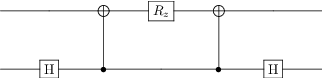

In [26]:
from qutip.qip.circuit import QubitCircuit, Gate


qc = QubitCircuit(2)
qc.add_gate("SNOT",targets=0)
qc.add_gate("CNOT",controls=0,targets=1)

qc.add_gate("RZ",targets=1,arg_value=np.pi/2) # arg_value=2*theta
qc.add_gate("CNOT",controls=0,targets=1)
qc.add_gate("SNOT",targets=0)
qc.png

In [27]:
U_list = qc.propagators()
print(U_list)

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678-0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678-0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678+0.70710678j]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm

In [28]:
U_list[0]*U_list[1]*U_list[2]*U_list[3]*U_list[4]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.        -0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

## $\exp(-i\theta\sigma_{y}\sigma_{z}\sigma_{x})$

In [29]:
oper=-1*theta*tensor(sig_y,sig_z,sig_x)
U=oper.expm()

In [30]:
U

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.          0.          0.          0.         -0.70710678
   0.          0.        ]
 [ 0.          0.70710678  0.          0.         -0.70710678  0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.          0.70710678]
 [ 0.          0.          0.          0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.          0.70710678  0.
   0.          0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.70710678
   0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.         -0.70710678  0.          0.          0.
   0.          0.70710678]]

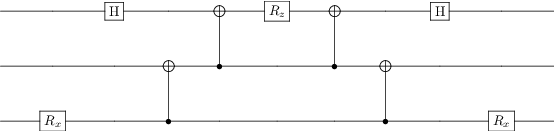

In [31]:
from qutip.qip.circuit import QubitCircuit, Gate


qc = QubitCircuit(3)
qc.add_gate("RX",targets=0,arg_value=np.pi/2)
qc.add_gate("SNOT",targets=2)

qc.add_gate("CNOT",controls=0,targets=1)
qc.add_gate("CNOT",controls=1,targets=2)

qc.add_gate("RZ",targets=2,arg_value=-1*np.pi/2) # arg_value=2*theta

qc.add_gate("CNOT",controls=1,targets=2)
qc.add_gate("CNOT",controls=0,targets=1)

qc.add_gate("SNOT",targets=2)
qc.add_gate("RX",targets=0,arg_value=-1*np.pi/2)

#qc.add_gate("SNOT",targets=2)
qc.png

In [32]:
U_list = qc.propagators()
#print(U_list)

In [33]:
Usim=U_list[0]*U_list[1]*U_list[2]*U_list[3]*U_list[4]*U_list[5]*U_list[6]*U_list[7]*U_list[8]
Usim

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.          0.          0.          0.         -0.70710678
   0.          0.        ]
 [ 0.          0.70710678  0.          0.         -0.70710678  0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.          0.70710678]
 [ 0.          0.          0.          0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.          0.70710678  0.
   0.          0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.70710678
   0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.         -0.70710678  0.          0.          0.
   0.          0.70710678]]

In [34]:
U

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.          0.          0.          0.         -0.70710678
   0.          0.        ]
 [ 0.          0.70710678  0.          0.         -0.70710678  0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.          0.70710678]
 [ 0.          0.          0.          0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.          0.70710678  0.
   0.          0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.70710678
   0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.          0.
   0.70710678  0.        ]
 [ 0.          0.         -0.70710678  0.          0.          0.
   0.          0.70710678]]

In [35]:
Usim==U

True

## $\exp(i\theta \sigma_{x}^{0}\sigma_{x}^{1}\sigma_{y}^{3}\sigma_{y}^{4}\sigma_{z}^{5})$

In [36]:
oper=theta*tensor(sig_x,sig_x,I,sig_y,sig_y,sig_z)
U=oper.expm()

In [37]:
U

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.70710678+0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.70710678+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.70710678+0.j]]

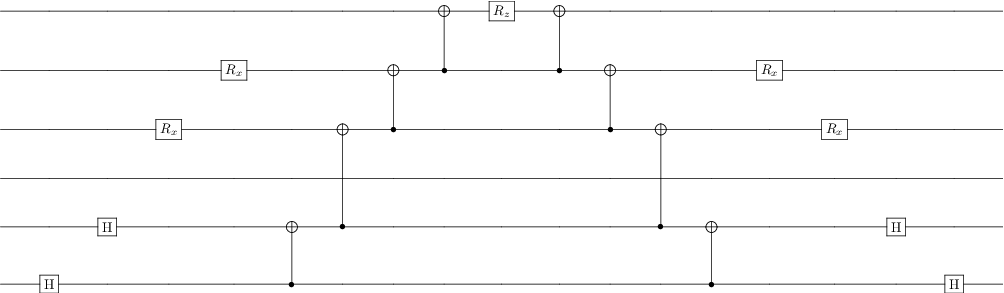

In [38]:
qc=QubitCircuit(6)

qc.add_gate("SNOT",targets=0)
qc.add_gate("SNOT",targets=1)
qc.add_gate("RX",targets=3,arg_value=np.pi/2)
qc.add_gate("RX",targets=4,arg_value=np.pi/2)

qc.add_gate("CNOT",controls=0,targets=1)
qc.add_gate("CNOT",controls=1,targets=3)
#qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=3,targets=4)
qc.add_gate("CNOT",controls=4,targets=5)

qc.add_gate("RZ",targets=5,arg_value=-1*np.pi/2) # arg_value=2*theta

qc.add_gate("CNOT",controls=4,targets=5)
qc.add_gate("CNOT",controls=3,targets=4)
#qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=1,targets=3)
qc.add_gate("CNOT",controls=0,targets=1)

qc.add_gate("RX",targets=4,arg_value=-1*np.pi/2)
qc.add_gate("RX",targets=3,arg_value=-1*np.pi/2)
qc.add_gate("SNOT",targets=1)
qc.add_gate("SNOT",targets=0)
qc.png

In [39]:
U_list = qc.propagators()
#print(U_list)
len(U_list)

17

In [40]:
Usim=U_list[0]*U_list[1]*U_list[2]*U_list[3]*U_list[4]*U_list[5]*U_list[6]*U_list[7]*U_list[8]*U_list[9]*U_list[10]*U_list[11]*U_list[12]*U_list[13]*U_list[14]*U_list[15]*U_list[16]
Usim

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.70710678+0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.70710678+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.70710678+0.j]]

In [41]:
U==Usim

True

## $\exp(i\theta \sigma_{x}^{0}\sigma_{x}^{1}\sigma_{z}^{2}\sigma_{y}^{3}\sigma_{y}^{4})$

In [42]:
oper=theta*tensor(sig_x,sig_x,sig_z,sig_y,sig_y,I)
U=oper.expm()

In [43]:
U

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.70710678+0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.70710678+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.70710678+0.j]]

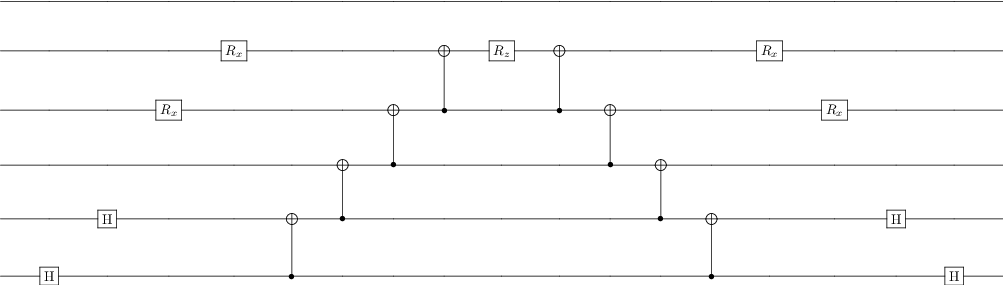

In [44]:
qc=QubitCircuit(6)

qc.add_gate("SNOT",targets=0)
qc.add_gate("SNOT",targets=1)
qc.add_gate("RX",targets=3,arg_value=np.pi/2)
qc.add_gate("RX",targets=4,arg_value=np.pi/2)

qc.add_gate("CNOT",controls=0,targets=1)
qc.add_gate("CNOT",controls=1,targets=2)
qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=3,targets=4)
#qc.add_gate("CNOT",controls=4,targets=5)

qc.add_gate("RZ",targets=4,arg_value=-1*np.pi/2) # arg_value=2*theta

#qc.add_gate("CNOT",controls=4,targets=5)
qc.add_gate("CNOT",controls=3,targets=4)
qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=1,targets=2)
qc.add_gate("CNOT",controls=0,targets=1)

qc.add_gate("RX",targets=4,arg_value=-1*np.pi/2)
qc.add_gate("RX",targets=3,arg_value=-1*np.pi/2)
qc.add_gate("SNOT",targets=1)
qc.add_gate("SNOT",targets=0)
qc.png

In [45]:
U_list = qc.propagators()
#print(U_list)
len(U_list)

17

In [46]:
Usim=U_list[0]*U_list[1]*U_list[2]*U_list[3]*U_list[4]*U_list[5]*U_list[6]*U_list[7]*U_list[8]*U_list[9]*U_list[10]*U_list[11]*U_list[12]*U_list[13]*U_list[14]*U_list[15]*U_list[16]
Usim

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.70710678+0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.70710678+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.70710678+0.j]]

In [47]:
U==Usim

True

## $\exp(i\theta \sigma_{x}^{0}\sigma_{x}^{1}\sigma_{z}^{2}\sigma_{y}^{3}\sigma_{y}^{4}\sigma_{z}^{5})$

In [98]:
oper=theta*tensor(sig_x,sig_x,sig_z,sig_y,sig_y,sig_z)
U=oper.expm()

In [99]:
U

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.70710678+0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.70710678+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.70710678+0.j]]

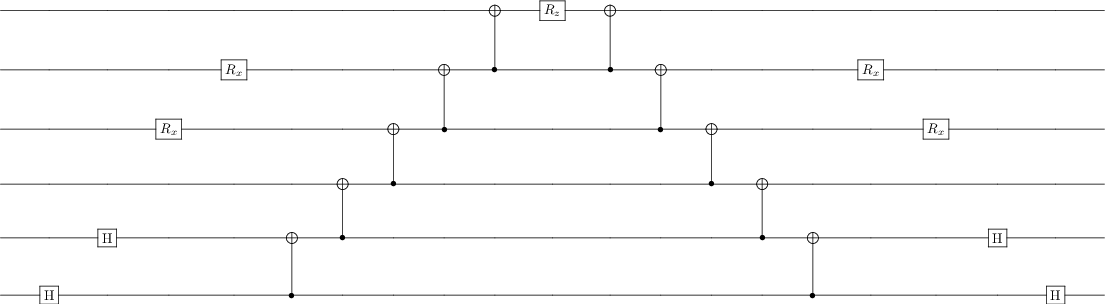

In [100]:
qc=QubitCircuit(6)

qc.add_gate("SNOT",targets=0)
qc.add_gate("SNOT",targets=1)
qc.add_gate("RX",targets=3,arg_value=np.pi/2)
qc.add_gate("RX",targets=4,arg_value=np.pi/2)

qc.add_gate("CNOT",controls=0,targets=1)
qc.add_gate("CNOT",controls=1,targets=2)
qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=3,targets=4)
qc.add_gate("CNOT",controls=4,targets=5)

qc.add_gate("RZ",targets=5,arg_value=-1*np.pi/2) # arg_value=2*theta

qc.add_gate("CNOT",controls=4,targets=5)
qc.add_gate("CNOT",controls=3,targets=4)
qc.add_gate("CNOT",controls=2,targets=3)
qc.add_gate("CNOT",controls=1,targets=2)
qc.add_gate("CNOT",controls=0,targets=1)

qc.add_gate("RX",targets=4,arg_value=-1*np.pi/2)
qc.add_gate("RX",targets=3,arg_value=-1*np.pi/2)
qc.add_gate("SNOT",targets=1)
qc.add_gate("SNOT",targets=0)
qc.png

In [101]:
U_list = qc.propagators()
#print(U_list)
len(U_list)

19

In [102]:
dim=np.shape(U_list[0])[0]
Usim=np.eye(dim)
i=0
while i<(len(U_list)):
    Usim=Usim*U_list[i]
    #print(i)
    i=i+1
    
Usim

array([[0.70710678+0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.70710678+0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.70710678+0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j],
       ...,
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
        0.70710678+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.70710678+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.70710678+0.j]])

In [103]:
Usim==U

False

## $U_{0134}$ Term

In [54]:
c=1/4
oper=c*(tensor(sig_p,sig_m,I,sig_m,sig_p,I)+tensor(sig_m,sig_p,I,sig_p,sig_m,I))

In [55]:
c2=1/32
oper2=c2*(tensor(sig_x,sig_x,I,sig_x,sig_x,I)+tensor(sig_x,sig_x,I,sig_y,sig_y,I)+tensor(sig_x,sig_y,I,sig_x,sig_y,I)-tensor(sig_x,sig_y,I,sig_y,sig_x,I)-tensor(sig_y,sig_x,I,sig_x,sig_y,I)+tensor(sig_y,sig_x,I,sig_y,sig_x,I)+tensor(sig_y,sig_y,I,sig_x,sig_x,I)+tensor(sig_y,sig_y,I,sig_y,sig_y,I))

In [56]:
oper==oper2

True

## $2^{nd} term$

In [57]:
c=1/4
oper=c*(tensor(sig_p,sig_m,I,sig_m,sig_p,sig_z)+tensor(sig_m,sig_p,I,sig_p,sig_m,sig_z))

In [58]:
oper

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [59]:
import pandas as pd
Umat=np.matrix(oper)
df = pd.DataFrame(data=Umat.astype(complex))
df.to_csv('Unitary_matrix_Second Term.csv', sep=' ', header=False, float_format='%.4f', index=False)

In [60]:
c2=1/32
oper2=c2*(tensor(sig_x,sig_x,I,sig_x,sig_x,sig_z)+tensor(sig_x,sig_x,I,sig_y,sig_y,sig_z)+tensor(sig_x,sig_y,I,sig_x,sig_y,sig_z)-tensor(sig_x,sig_y,I,sig_y,sig_x,sig_z)-tensor(sig_y,sig_x,I,sig_x,sig_y,sig_z)+tensor(sig_y,sig_x,I,sig_y,sig_x,sig_z)+tensor(sig_y,sig_y,I,sig_x,sig_x,sig_z)+tensor(sig_y,sig_y,I,sig_y,sig_y,sig_z))

In [61]:
oper2

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [62]:
oper==oper2 

True

In [63]:
import pandas as pd
Umat=np.matrix(oper2)
df = pd.DataFrame(data=Umat.astype(complex))
df.to_csv('Unitary_matrix_oper2.csv', sep=' ', header=False, float_format='%.4f', index=False)

## $3^{rd} term$

In [64]:
c=1/4
oper=c*(tensor(sig_p,sig_m,sig_z,sig_m,sig_p,I)+tensor(sig_m,sig_p,sig_z,sig_p,sig_m,I))

In [65]:
oper

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [66]:
c2=1/32
oper2=c2*(tensor(sig_x,sig_x,sig_z,sig_x,sig_x,I)+tensor(sig_x,sig_x,sig_z,sig_y,sig_y,I)+tensor(sig_x,sig_y,sig_z,sig_x,sig_y,I)-tensor(sig_x,sig_y,sig_z,sig_y,sig_x,I)-tensor(sig_y,sig_x,sig_z,sig_x,sig_y,I)+tensor(sig_y,sig_x,sig_z,sig_y,sig_x,I)+tensor(sig_y,sig_y,sig_z,sig_x,sig_x,I)+tensor(sig_y,sig_y,sig_z,sig_y,sig_y,I))

In [67]:
oper2

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [68]:
oper==oper2

True

## $ 4^{th} term$

In [69]:
c=1/4
oper=c*(tensor(sig_p,sig_m,sig_z,sig_m,sig_p,sig_z)+tensor(sig_m,sig_p,sig_z,sig_p,sig_m,sig_z))

In [70]:
c2=1/32
oper2=c2*(tensor(sig_x,sig_x,sig_z,sig_x,sig_x,sig_z)+tensor(sig_x,sig_x,sig_z,sig_y,sig_y,sig_z)+tensor(sig_x,sig_y,sig_z,sig_x,sig_y,sig_z)-tensor(sig_x,sig_y,sig_z,sig_y,sig_x,sig_z)-tensor(sig_y,sig_x,sig_z,sig_x,sig_y,sig_z)+tensor(sig_y,sig_x,sig_z,sig_y,sig_x,sig_z)+tensor(sig_y,sig_y,sig_z,sig_x,sig_x,sig_z)+tensor(sig_y,sig_y,sig_z,sig_y,sig_y,sig_z))

In [71]:
oper==oper2

True

## $U_{0145}$ Term

## First term

In [72]:
c=1/(2*np.sqrt(2))
oper=c*(tensor(sig_p,sig_m,I,I,sig_m,sig_p)+tensor(sig_m,sig_p,I,I,sig_p,sig_m))

In [73]:
c2=1/(16*np.sqrt(2))
oper2=c2*(tensor(sig_x,sig_x,I,I,sig_x,sig_x)+tensor(sig_x,sig_x,I,I,sig_y,sig_y)+tensor(sig_x,sig_y,I,I,sig_x,sig_y)-tensor(sig_x,sig_y,I,I,sig_y,sig_x)-tensor(sig_y,sig_x,I,I,sig_x,sig_y)+tensor(sig_y,sig_x,I,I,sig_y,sig_x)+tensor(sig_y,sig_y,I,I,sig_x,sig_x)+tensor(sig_y,sig_y,I,I,sig_y,sig_y))

In [74]:
oper==oper2

True

## Second Term

In [75]:
c=1/(2*np.sqrt(2))
oper=c*(tensor(sig_p,sig_m,I,sig_z,sig_m,sig_p)+tensor(sig_m,sig_p,I,sig_z,sig_p,sig_m))
oper

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [76]:
c2=1/(16*np.sqrt(2))
oper2=c2*(tensor(sig_x,sig_x,I,sig_z,sig_x,sig_x)+tensor(sig_x,sig_x,I,sig_z,sig_y,sig_y)+tensor(sig_x,sig_y,I,sig_z,sig_x,sig_y)-tensor(sig_x,sig_y,I,sig_z,sig_y,sig_x)-tensor(sig_y,sig_x,I,sig_z,sig_x,sig_y)+tensor(sig_y,sig_x,I,sig_z,sig_y,sig_x)+tensor(sig_y,sig_y,I,sig_z,sig_x,sig_x)+tensor(sig_y,sig_y,I,sig_z,sig_y,sig_y))

In [77]:
oper==oper2

True

## Checking the Circuit

## $ U_{0145}$

In [104]:
c=1/(2*np.sqrt(2))

oper=theta*c*(tensor(sig_p,sig_m,sig_z,I,sig_m,sig_p)+tensor(sig_m,sig_p,sig_z,I,sig_p,sig_m))

U=oper.expm()
U

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]]

### Circuit in Qutip

In [105]:
def staircase_circ(a,b,c,d,Z1,Z2,e,qc):
    
    arr=[a,b,c,d]
    
    if Z1&Z2==0:
        if Z1 != 0:
            arr.append(Z1)
        if Z2 != 0:
            arr.append(Z2)
    else:
        arr.append(Z1)
        arr.append(Z2)
    
    arr=np.sort(arr)
     
    for i in range(len(arr)-1):
        qc.add_gate('CNOT',targets=arr[i+1],controls=arr[i])
        
    qc.add_gate('RZ',targets=arr[-1],arg_value=e)
    
    for i in range(len(arr)-1):
        i=len(arr)-i-1
        qc.add_gate('CNOT',targets=arr[i],controls=arr[i-1])
        
    return(qc)

def quantum_circ(a,b,c,d,z1,z2,e,n):
    
    qc=QubitCircuit(n)
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("SNOT",targets=d)
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("SNOT",targets=d)
    #______________________________________

    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("RX",targets=c,arg_value=np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("RX",targets=c,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=-1*np.pi/2)
    
    #______________________________________
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("RX",targets=b,arg_value=np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("RX",targets=b,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=-1*np.pi/2)
    
    #______________________________________
    
    qc.add_gate("SNOT",targets=a)
    qc.add_gate("SNOT",targets=d)
    qc.add_gate("RX",targets=b,arg_value=np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,-1*e,qc)
    
    qc.add_gate("RX",targets=b,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=-1*np.pi/2)
    qc.add_gate("SNOT",targets=d)
    qc.add_gate("SNOT",targets=a)
    
    #_________________________________________
    
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("RX",targets=a,arg_value=np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,-1*e,qc)
    
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("RX",targets=a,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=-1*np.pi/2)
    #____________________________________________
    
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=d)
    qc.add_gate("RX",targets=a,arg_value=np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("RX",targets=a,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=-1*np.pi/2)
    qc.add_gate("SNOT",targets=b)
    qc.add_gate("SNOT",targets=d)
    
    #_____________________________________________
    
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("SNOT",targets=d)
    qc.add_gate("RX",targets=a,arg_value=np.pi/2)
    qc.add_gate("RX",targets=b,arg_value=np.pi/2)
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("RX",targets=a,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=b,arg_value=-1*np.pi/2)
    qc.add_gate("SNOT",targets=c)
    qc.add_gate("SNOT",targets=d)
    
    #_______________________________________________
    
    qc.add_gate("RX",targets=a,arg_value=np.pi/2)
    qc.add_gate("RX",targets=b,arg_value=np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=np.pi/2)
    
    
    staircase_circ(a,b,c,d,z1,z2,e,qc)
    
    qc.add_gate("RX",targets=a,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=b,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=c,arg_value=-1*np.pi/2)
    qc.add_gate("RX",targets=d,arg_value=-1*np.pi/2)
    
    
    return(qc)
    

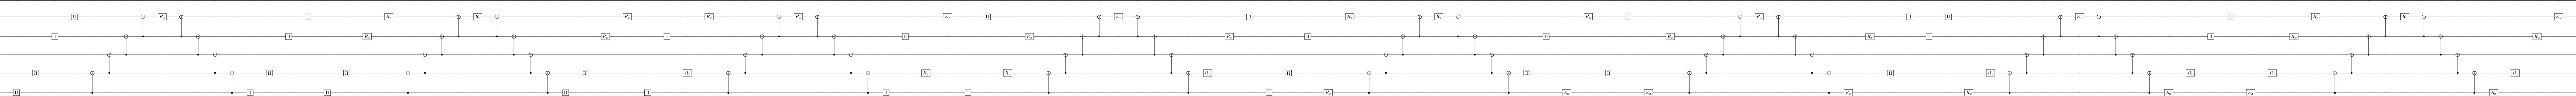

In [106]:
circ=quantum_circ(0,1,3,4,2,0,-1*np.pi/(32*np.sqrt(2)),6)
circ.png

In [107]:
U_list = circ.propagators()
#print(U_list)
len(U_list)

136

In [108]:
dim=np.shape(U_list[0])[0]
Usim=np.eye(dim)
i=0
while i<(len(U_list)):
    Usim=Usim*U_list[i]
    #print(i)
    i=i+1
    
Usim

array([[ 1.00000000e+00-1.30104261e-18j,  0.00000000e+00+0.00000000e+00j,
         4.33680869e-19+5.55111512e-17j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00-1.30104261e-18j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 8.67361738e-19-5.55111512e-17j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00+1.73472348e-18j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.00000000e+00-1.73472348e-18j,  0.00000000e+00+0.00000000e+00j,
        -8.67361738e-19-5.55111512e-17j],
       [ 0.00000000e+00+0.00000000e+00j,  0.

In [109]:
Usim==U

False